## STOCKAGE DISTRIBUÉ ET HDFS

Hadoop résout le problème lié au MTBF en dupliquant  la donnée (pardéfaut  trois  copies).  HDFS  (Hadoop  Distributed  File  System)  est  unoutil qui s’occupe de copier les informations à enregistrer d’un ordinateur(on  dira  aussi un nœud)  vers  d’autres,  automatiquement.  L’avantage  dece système est que si un disque dur tombe en panne, on peut récupérerl’information dans d’autres disques.Les  fichiers  sont  dupliqués  sur HDFS  en  étant  tout d’abord  divisés en blocs

Imaginons un cluster HDFS de quatre machines (ci-dessous les quatrecadres avec des adresses IP), et un fichier de quatre lignes enregistré surce cluster :


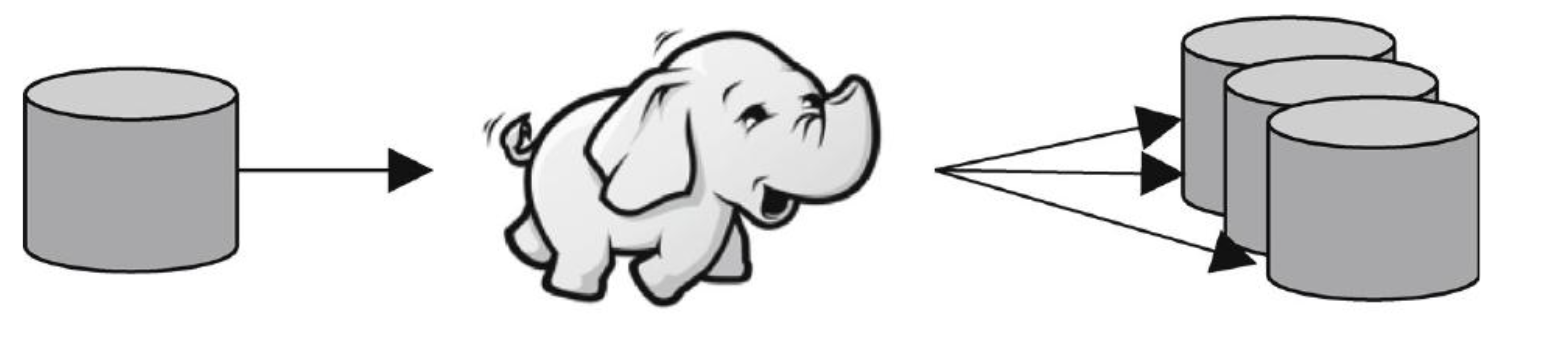

* ✓ Le fichier serait donc divisé en quatre blocs : B1, B2, B3, B4
* ✓ Chaque  bloc  serait  dupliqué  par  le  facteur  de  réplication,  pardéfaut trois fois, sur le cluster
* ✓ Le  nœud  maître  (NameNode  dans  la  terminologie  HDFS)enregistre  l’emplacement  de  chaque  bloc  (dans  son  fichier  FSImage)

* ✓ Chaque  nœud  esclave  (DataNode  dans  la  terminologie  HDFS)enregistre des blocs de fichiers

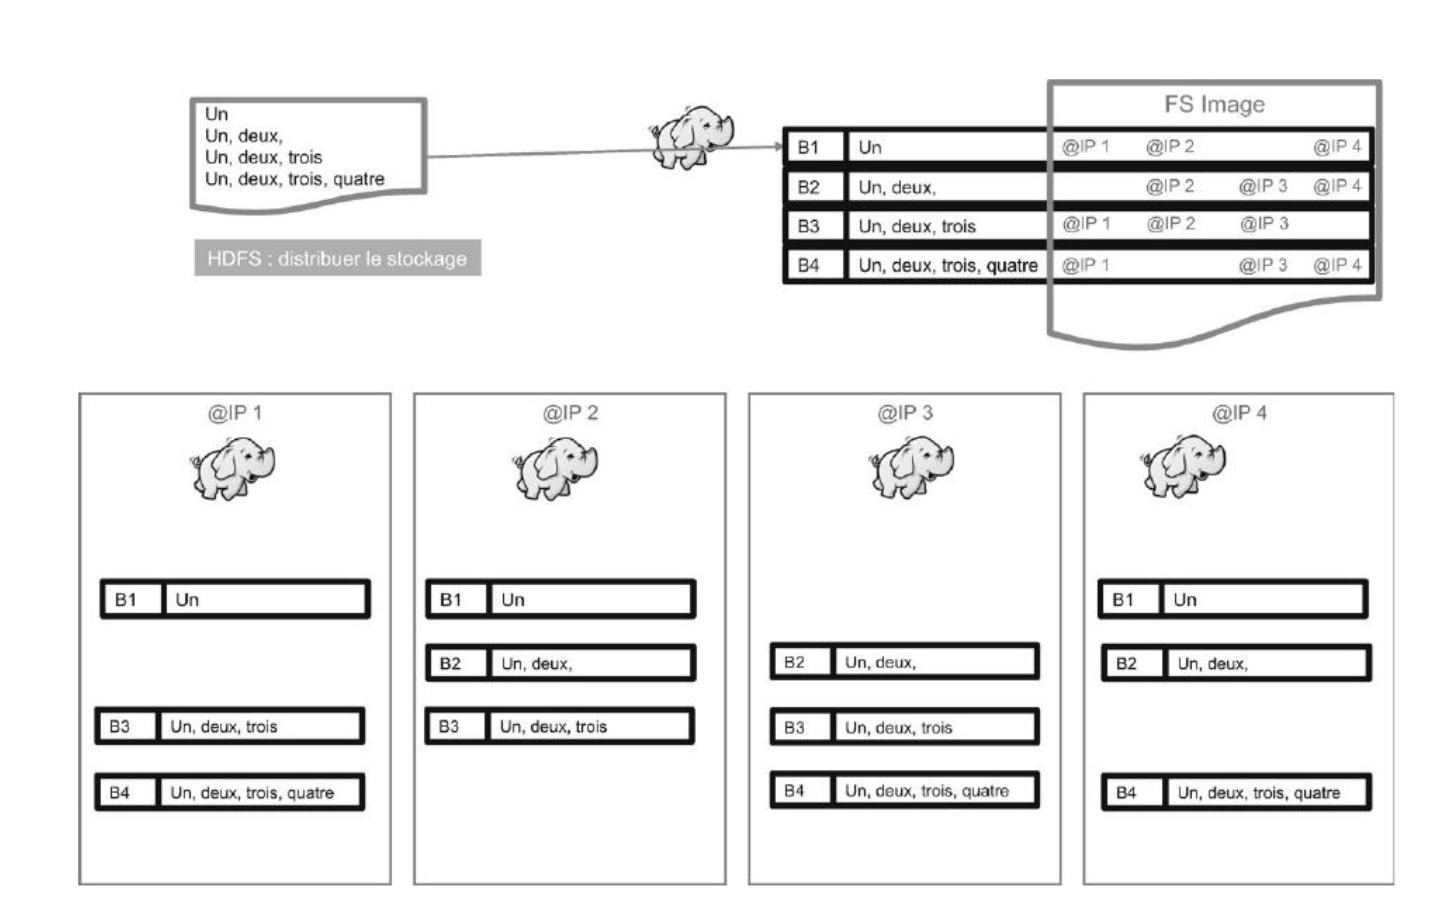

HDFS est gratuit.  Et l’autre  intérêt  de  ce  système  est  qu’il  permet  de faire  une  lecture  parallélisée  des  fichiers.  On  peut  lire  théoriquement avec  une  durée  de  lecture  divisée  par  le  nombre  de  blocs  créés.  Cette lecture  parallélisée  s’adapte  parfaitement  à  l’algorithme  MapReduce publié par Google en 2003. Dans cette première version, les résultats des calculs  intermédiaires  étaient  écrits  sur  disque  dur,  ce  qui  ralentit considérablement  la  vitesse  des  calculs.  Spark  change  cela  en enregistrant les résultats intermédiaires en mémoire

## LA FIN DES BASES DE DONNÉES SQL ?

Les bases  de  données  classiques  sont  basées  sur  des  modèles conceptuels de données. Dans ces systèmes le système de gestion des bases de données (SGBD) demande de préciser  le  modèle conceptuelde données (MCD) à utiliser  avant d’enregistrer de la donnée.  Cela  afinde minimiser l’espace disque utilisé, en garantissant la non-duplicationdes données (3 forme normale) afin de diminuer les coûts de stockage.

Avec la baisse drastique des coûts de stockage, limiter l’espace disque utilisé n’est plus un enjeu. Dès lors on peut mettre en œuvre de nouveaux concepts  d’enregistrement  de  la  donnée,  avec  une  duplication  des informations.  Cela  donne  naissance  à  la  notion  de  bases  de  données dénormalisées  orientées  documents,  dont  certaines  sont  basées sur  le formalisme  JSON  (Javascript  Simple  Object  Norm).  Dans  ces  bases orientées documents les informations sont dupliquées de telle manièreque  chaque  document  (JSON)  contienne  toutes  les  informations nécessaires à son utilisation.

Par exemple, dans une base d’achat on aurait classiquement une tablea vec le nom des acheteurs, une table avec le nom des produits uniques,et  une  table  de  liens  (montrant  qui  a  acheté  quoi).  En  enregistrement

orienté  document,  on  aura  un  document  JSON  pour  chaqueenr egistrement, dans  lequel  le nom  de l’acheteur  sera  écrit pour chaque achat,  ainsi  que  le  nom  du  produit.  Il  n’y  a  plus  d’unicité  des informations : elles sont dupliquées. C’est possible grâce à la baisse du coût des disques durs


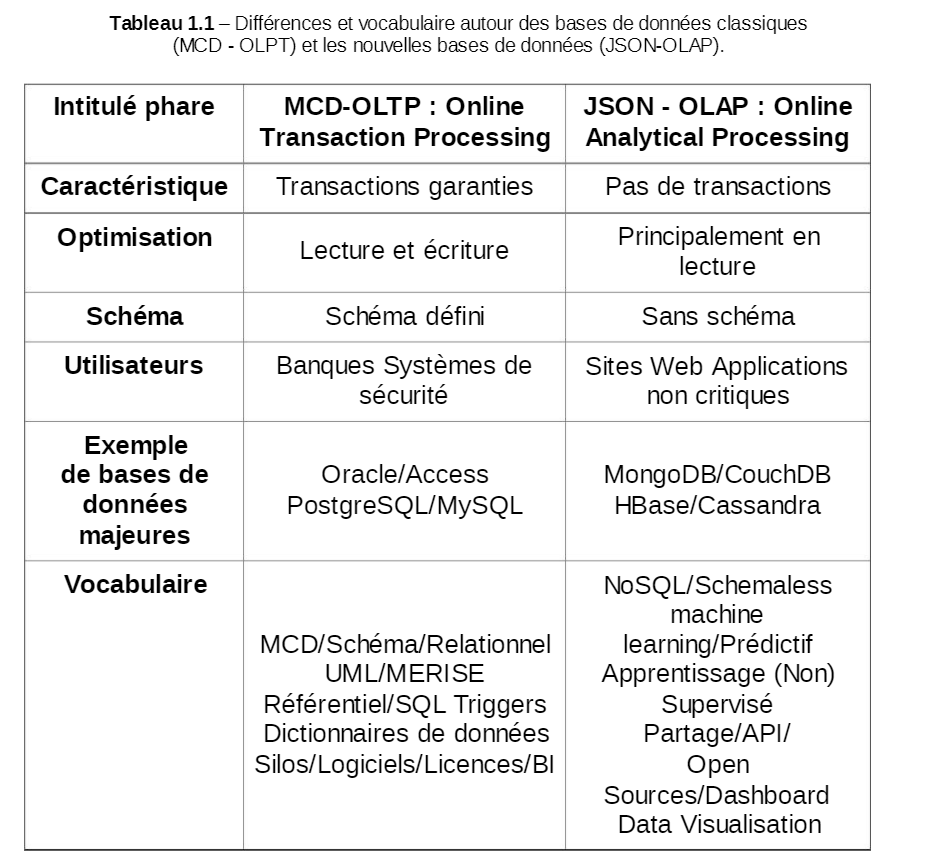

Cela  permet  d’envoyer  des  documents  de  données  (JSON)  qui  sont autosuffisants  en  termes  de  données  contenues,  et  qui  permettent  donc des  calculs  indépendants,  parallélisés  sur  les  différents  CPU  d’unordinateur,  ou  distribués  via  le  réseau  sur  un  cluster  d’ordinateurs.  Ces dées sont à l’origine de la création de l’algorithme MapReduce.

## L’ALGORITHME MAPREDUCE

L’algorithme  MapReduce  est  une  évolution  majeure  dans  l’histoire  de l’informatique  puisqu’il  propose  de  penser  les  logiciels  comme  devant fonctionner sur plusieurs machines de Turing (plusieurs ordinateurs)’.Quand  on  apprend  MapReduce  l’équivalent  du  «  hello  world  » standar d’consiste  à  compter  le nombre  d’occurrences des mots dans  unfichier.

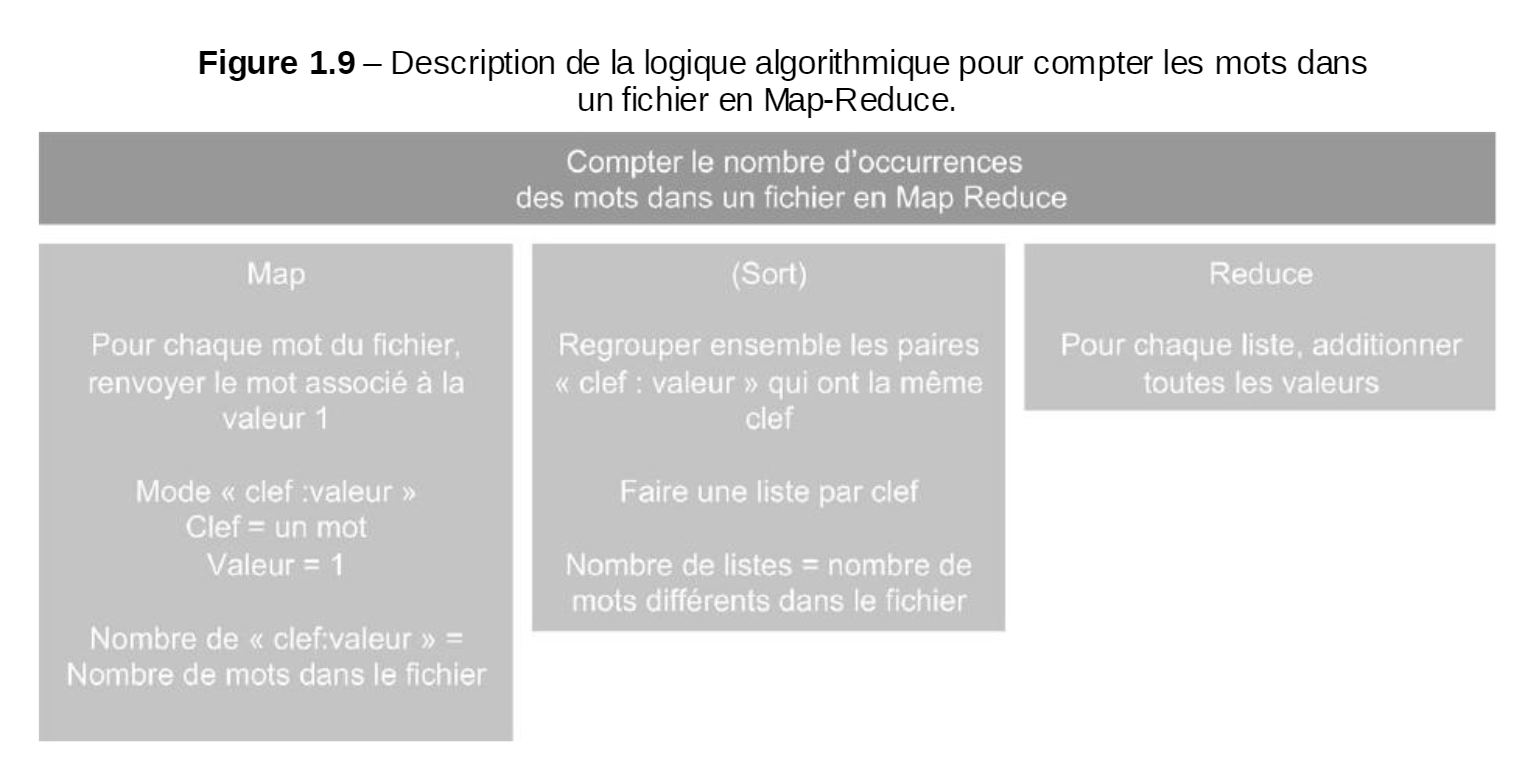

MapReduce  a  été  proposé  par  Google  en  2003,  puis  mis  en  opensource  via  Hadoop  en  2009.  La  phase  de  Map  est  distribuée  sur  les différentes machines du cluster, chaque machine renvoyant au master une liste de résultats intermédiaires. C’est cette liste que le master va réduire en  un  seul  résultat  via  la  fonction  Reduce  qui  n’est  exécutée  que  de 0manière centrale.

L’un  des  intérêts  de  la  distribution  du  calcul,  c’est  la  capacité  à dépasser  les  contraintes  de  la  loi  d’Amdahl.  Cette  dernière  spécifieque le gain en vitesse d’exécution d’un programme n’est pas proportionnel au  nombre  de  CPU  présents  dans  l’ordinateur  :  la  nécessaire synchronisation  entre  les  threads  impose  une  limite  au  gain  de  vitesse possible.

C’est ce qu’on voit dans le schéma ci-dessous :

* ✓ Avec 2 CPU on peut théoriquement aller jusqu’à 2 fois plus vite

* ✓ Avec 4 CPU, on va entre 2 et 3.75 fois plus vite
* ✓ Avec 16 CPU on va entre 2 et 9 fois plus vite
* ✓ La limite est atteinte avec 1024 CPU où l’on ne va que 20 fois plusvite


En distribuant le calcul, on s’affranchit théoriquement de cette limite, endéportant  le  problème  sur  le  réseau.  On  a  alors  un  gain  de  vitesse  qui n’est  évidemment  pas  linéaire,  mais  qui  n’est  plus  limité  :  il  suffit  de rajouter des ordinateurs pour aller plus vite. D’où l’intérêt des clusters.


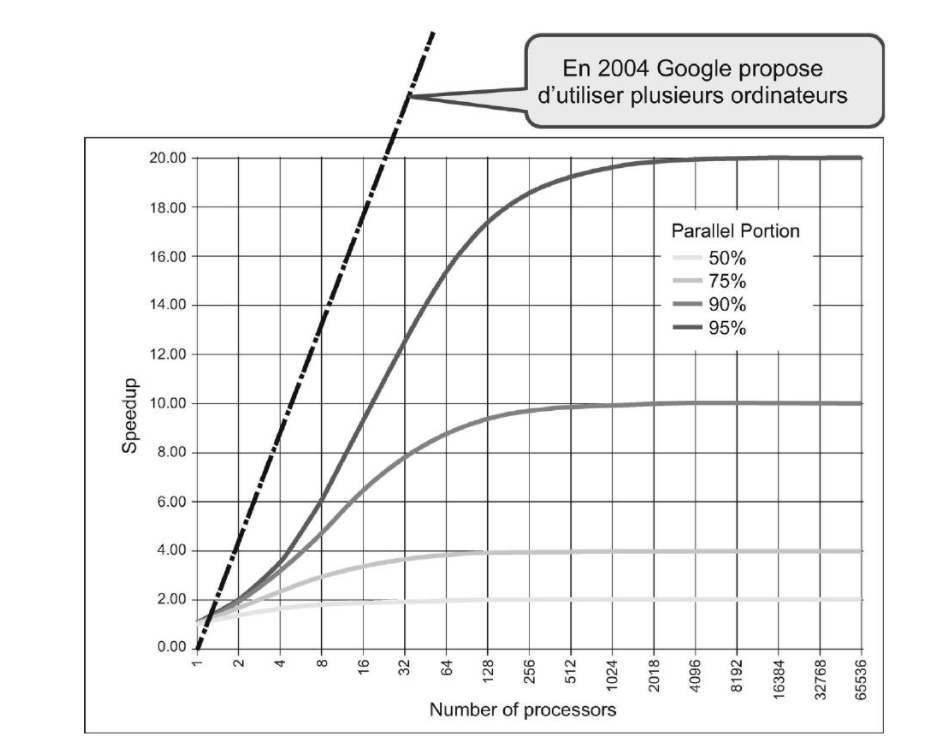

Nous présentons dans les trois schémas suivants le fonctionnement de MapReduce  sur  l’exemple  du  calcul  du  nombre  d’occurences  de  chaque mot dans un fichier.

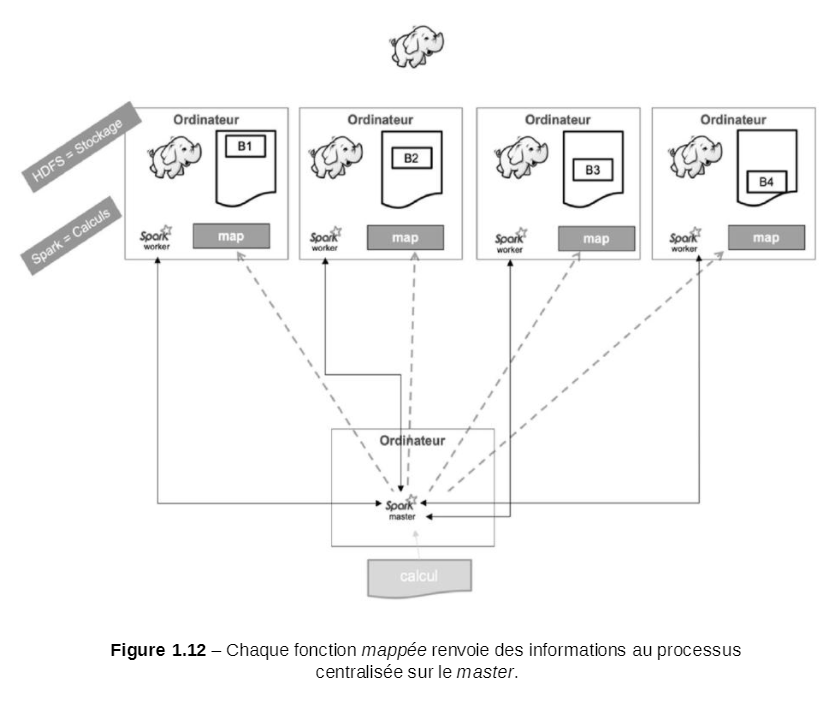

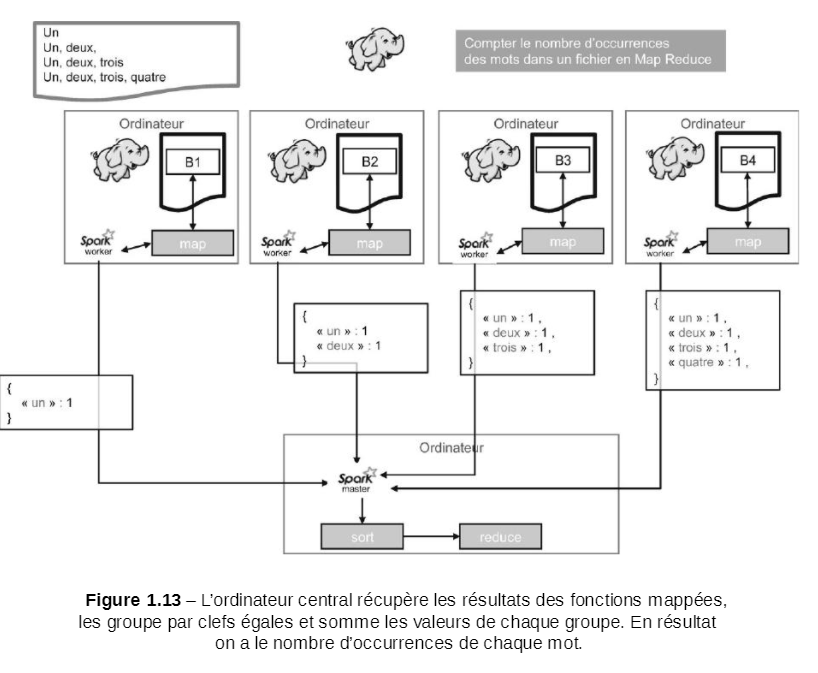

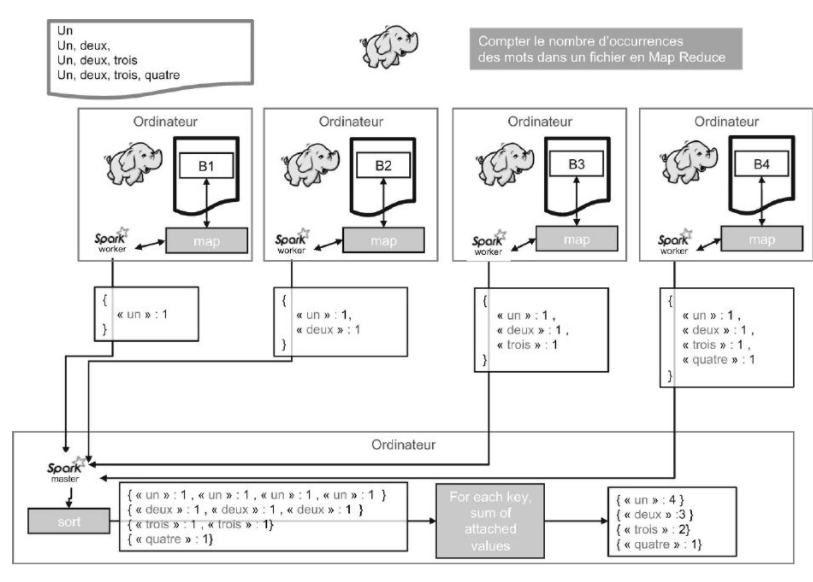

On  voit  bien  sur  cette  dernière  phase  pourquoi  on  parle  de MapReduce  :  la  fonction  Reduce  récupère  une  liste  de  valeurs,  et  la réduit en un résultat unique, un seul nombre

## SPARK : DES RÉSULTATS STOCKÉS EN MÉMOIRE

La  RAM  (Random  Access  Memory  :  mémoire  à  accès  aléatoire) permet  d’accéder  à  la  demande  à  n’importe  quelle  information  qu’elle possède, contrairement au disque dur, qui fait des lectures séquentielles,et  qui  demande  à  chaque  changement  de  lecture  de  bloc  de  déplacer physiquement la tête de lecture intégrée au disque.

Ainsi la RAM peut-elle être jusqu’à 1 300 fois plus rapide qu’un disquedur, comme le présente la figure ci-dessous :

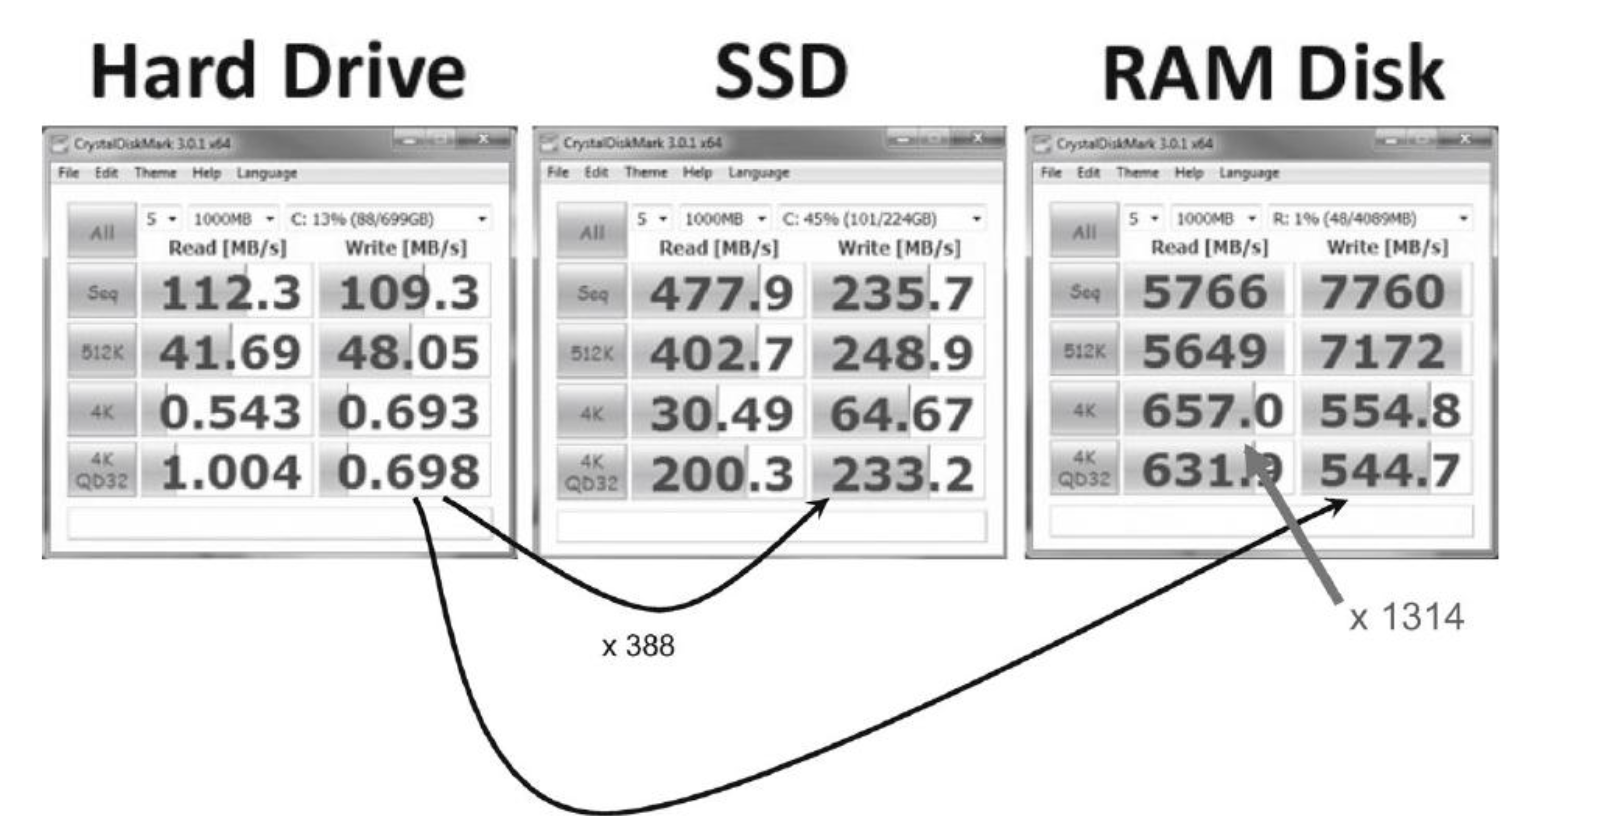

L’intérêt de Spark est d’utiliser intensivement la mémoire pour faire ses calculs,  à  l’inverse  des  premières  versions  d’Hadoop  qui  utilisaient  les disques durs. 

Ainsi Spark est-il bien plus rapide. La RAM pose plusieurs problèmes :

1. Elle est environ 400 fois plus chère que le disque dur.

2. On  peut  en  mettre  beaucoup  moins  sur  un  ordinateur  :  sur  un serveur  classique,  512  Go  de  RAM  est  déjà  beaucoup,  il  est difficile de dépasser le To de RAM. Alors que pour le disque dur, on  peut  facilement  avoir  beaucoup  jusqu’à  une  dizaine  de  To  destockage.

C’est pour cela qu’on peut aussi continuer à utiliser Hadoop pour gérerde très gros volumes qu’il ne serait plus rentable de gérer via de la RAM.On met alors au point des lambda architectures qui contiennent les deux technologies : sur disque et sur RAM

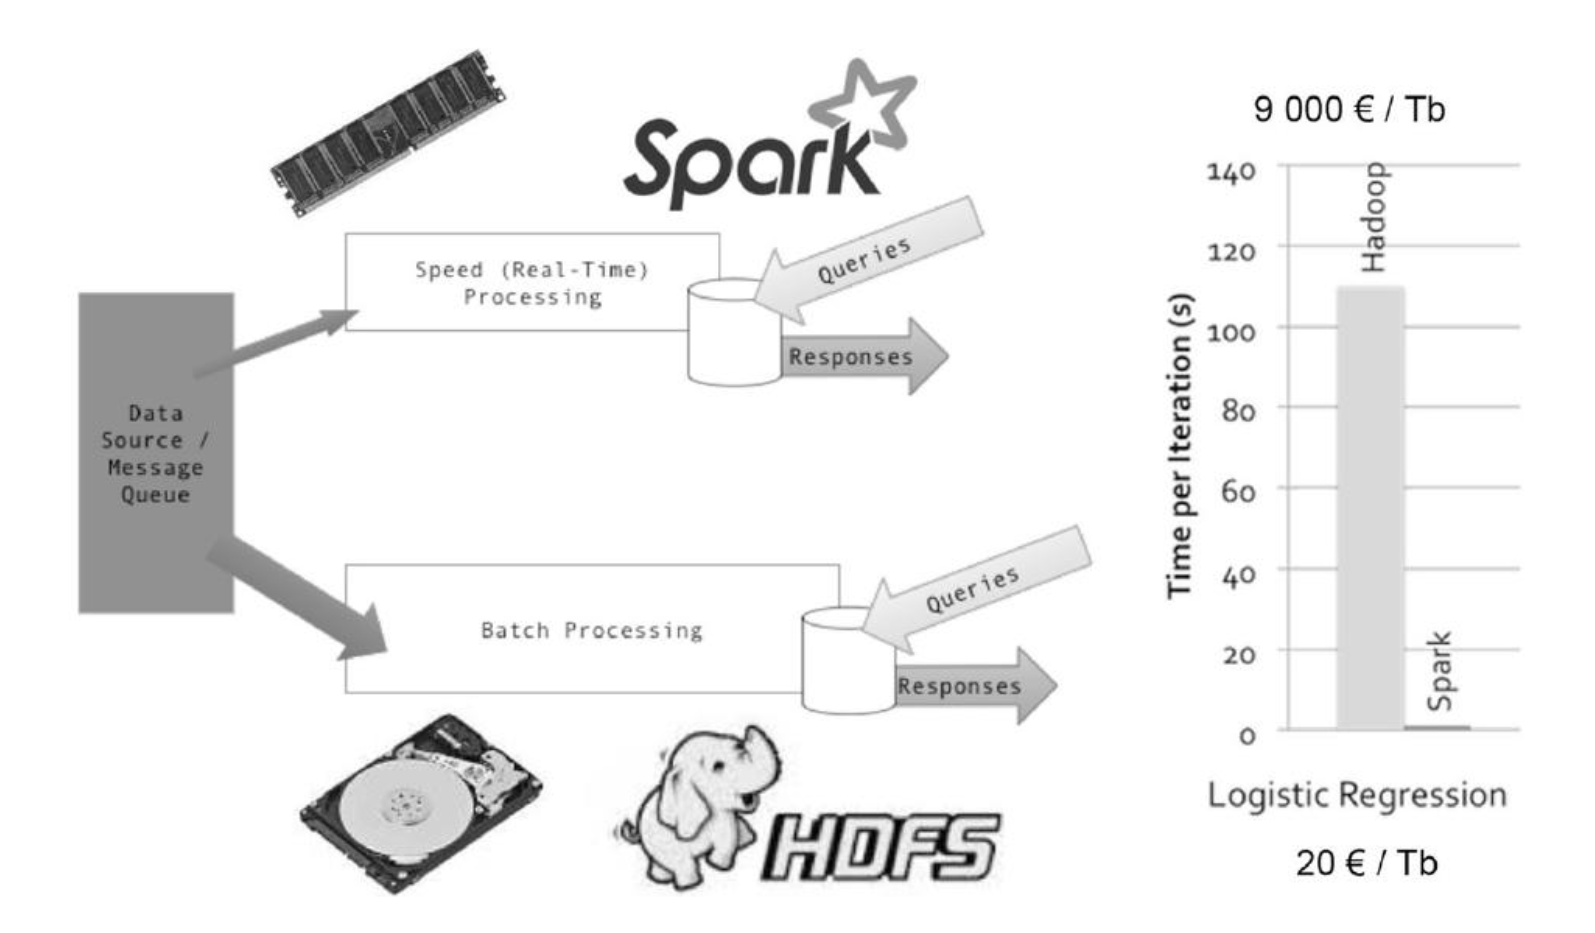

## SPARK PROPOSE UNE SOLUTION INTÉGRÉE POUR LE BIG DATA

Le framework MapReduce a donné lieu à la création d’une multitude de logiciels pour en faciliter la prise en main. La  multiplicité  des  outils  demandait  aux  informaticiens  d’acquérir  de nouvelles compétences, ce qui prenait  du  temps. 

L’un  des avantages de Spark  est  qu’il  est  manipulable  avec  différents  langages  deprogrammation : R, Python, Java, Scala (bientôt .NET). Ainsi il permet deréutiliser les connaissances historiques des informaticiens.